In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
#  Generate Input Data (X) and Output Data (y)
torch.manual_seed(71)  # For reproducibility
#Include your code here
X = torch.linspace(1, 50, 50).reshape(-1, 1)
e = torch.randint(-8, 9, (50, 1), dtype=torch.float)
y = 2 * X + 1 + e  # True function: y = 2x + noise


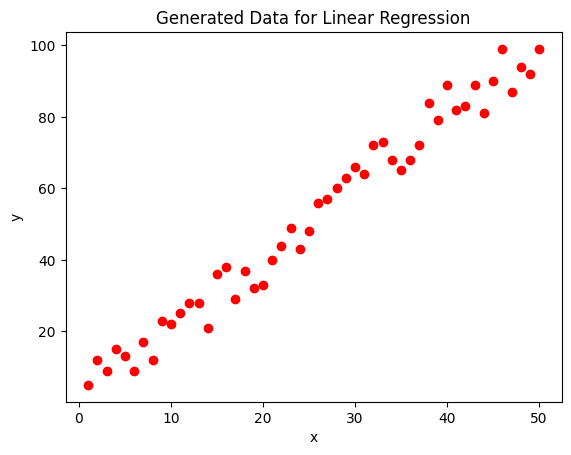

In [ ]:
# Plot the original data
plt.scatter(X, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [ ]:
# Define the Linear Model Class
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        #Include your code here
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        #Include your code here
        y_pred = self.linear(x)
        return y_pred

In [ ]:
# Initialize the Model
torch.manual_seed(71)  # Ensure same initial weights
model = Model(1, 1)

In [ ]:
# Print Initial Weights and Bias
initial_weight = model.linear.weight.item()
initial_bias = model.linear.bias.item()
print(f'Initial Weight: {initial_weight:.8f}, Initial Bias: {initial_bias:.8f}\n')

Initial Weight: 0.01453912, Initial Bias: -0.33057630



In [ ]:
# Define Loss Function & Optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# Train the Model
epochs = 100
losses = []

for epoch in range(1, epochs + 1):  # Loop over epochs
    #Include your code here
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()


    # Print loss, weight, and bias for EVERY epoch
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')

epoch:  1  loss: 3492.47949219  weight: 3.46647477  bias: -0.22665665
epoch:  2  loss: 1813.89184570  weight: 0.98613703  bias: -0.29899356
epoch:  3  loss: 947.29602051  weight: 2.76822829  bias: -0.24468856
epoch:  4  loss: 499.90264893  weight: 1.48769951  bias: -0.28137881
epoch:  5  loss: 268.92883301  weight: 2.40770984  bias: -0.25268871
epoch:  6  loss: 149.68443298  weight: 1.74659908  bias: -0.27097654
epoch:  7  loss: 88.12189484  weight: 2.22154808  bias: -0.25551113
epoch:  8  loss: 56.33843613  weight: 1.88022101  bias: -0.26429906
epoch:  9  loss: 39.92892456  weight: 2.12540078  bias: -0.25566173
epoch: 10  loss: 31.45640564  weight: 1.94916630  bias: -0.25954583
epoch: 11  loss: 27.08145714  weight: 2.07572460  bias: -0.25443423
epoch: 12  loss: 24.82195282  weight: 1.98472154  bias: -0.25578731
epoch: 13  loss: 23.65456963  weight: 2.05004001  bias: -0.25249654
epoch: 14  loss: 23.05101013  weight: 2.00303864  bias: -0.25254360
epoch: 15  loss: 22.73853111  weight: 2.

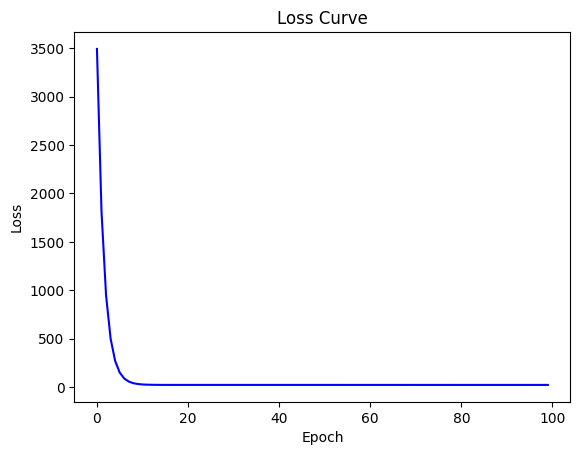

In [ ]:
# Plot Loss Curve
plt.plot(range(epochs), losses, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.show()

In [ ]:
# Final Weights & Bias
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()

print(f'\nFinal Weight: {final_weight:.8f}, Final Bias: {final_bias:.8f}')


Final Weight: 2.01929975, Final Bias: -0.13842338


In [ ]:
#  Best-Fit Line Calculation
x1 = torch.tensor([X.min().item(), X.max().item()]) # Find min and max values of X
y1 = x1 * final_weight + final_bias # Compute corresponding y-values using trained model

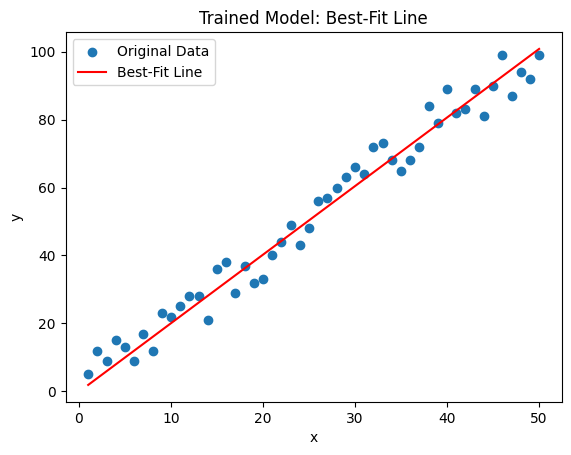

In [ ]:
# Plot Original Data & Best-Fit Line
plt.scatter(X, y, label="Original Data")
plt.plot(x1, y1, 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [ ]:
# Prediction for x = 120
x_new = torch.tensor([[120.0]])  # New input as a tensor
y_new_pred = model(x_new).item()  # Predict using trained model

print(f"\nPrediction for x = 120: {y_new_pred:.8f}")


Prediction for x = 120: 242.17753601
